# draw distribution of data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
DATA_PATH_ROOT = '/Users/yanyz/data/TOUGH-M1'
header = ['PDB-ID-1', 'PDB-ID-2', 'sequence_identity', 'TM-score', 'Ligand_Tanimoto_coefficient']

In [ ]:
positive = pd.read_csv(f'{DATA_PATH_ROOT}/TOUGH-M1_positive.list', sep=' ', names=header)
negative = pd.read_csv(f'{DATA_PATH_ROOT}/TOUGH-M1_negative.list', sep=' ', names=header)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot sequence_identity
positive['sequence_identity'].hist(bins=50, alpha=0.5, label='Positive', color='blue', ax=axes[0])
negative['sequence_identity'].hist(bins=50, alpha=0.5, label='Negative', color='red', ax=axes[0])
axes[0].set_title('Distribution of Sequence Identity')
axes[0].set_xlabel('Sequence Identity')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot TM-score
positive['TM-score'].hist(bins=50, alpha=0.5, label='Positive', color='blue', ax=axes[1])
negative['TM-score'].hist(bins=50, alpha=0.5, label='Negative', color='red', ax=axes[1])
axes[1].set_title('Distribution of TM-score')
axes[1].set_xlabel('TM-score')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot Ligand_Tanimoto_coefficient
positive['Ligand_Tanimoto_coefficient'].hist(bins=50, alpha=0.5, label='Positive', color='blue', ax=axes[2])
negative['Ligand_Tanimoto_coefficient'].hist(bins=50, alpha=0.5, label='Negative', color='red', ax=axes[2])
axes[2].set_title('Distribution of Ligand Tanimoto Coefficient')
axes[2].set_xlabel('Ligand Tanimoto Coefficient')
axes[2].set_ylabel('Frequency')

axes[2].legend()

plt.tight_layout()
plt.show()

# maximum distance of two points in a pocket (roughly pocket size)

In [3]:
import numpy as np
from scipy.spatial import ConvexHull
import os

In [4]:
def max_distance_brute_force(points):
    """Compute max pairwise distance using brute force."""
    max_dist = 0
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            dist = np.linalg.norm(points[i] - points[j])
            max_dist = max(max_dist, dist)
    return max_dist

def max_distance_convex_hull(points):
    """Compute max distance using convex hull approach."""
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    return max_distance_brute_force(hull_points)  # Only compare hull points

In [5]:
def process_xyz_files(directory):
    """Process all .xyz files in the given directory."""
    results = {}
    error = []

    for filename in os.listdir(directory):
        if filename.endswith(".xyz"):
            filepath = os.path.join(directory, filename)
            try:
                points = np.loadtxt(filepath)

                if points.shape[0] < 2:  # Ensure at least 2 points exist
                    max_dist = 0
                else:
                    max_dist = max_distance_convex_hull(points)

                results[filename] = max_dist
                # print(f"{filename}: Max Distance = {max_dist:.4f}")

            except Exception as e:
                print(f"Error processing {filename}: {e}")
                error.append(filename)
                continue  # Skip this file and continue with the next one

    return results, error

# Example usage
xyz_directory = "/Users/yanyz/data/TOUGH-M1/best_pockets/xyz"  # Modify path
results, error = process_xyz_files(xyz_directory)

In [6]:
results

{'4eeuA.xyz': 13.163810466578438,
 '3vvdA.xyz': 5.724966113436832,
 '1gewA.xyz': 16.899165127307327,
 '2hgxA.xyz': 20.52290861452148,
 '4lrtD.xyz': 13.911079181716993,
 '4qt9B.xyz': 20.54999627737192,
 '2djhA.xyz': 7.41196694542009,
 '1z6zF.xyz': 26.372234755515123,
 '3cf0L.xyz': 16.677102086393784,
 '3rm8A.xyz': 17.156874890259008,
 '2w0mA.xyz': 11.567892936918113,
 '1w1aB.xyz': 16.33357551181003,
 '3ergA.xyz': 12.350991336730827,
 '4i1dC.xyz': 13.008629674181668,
 '4twrA.xyz': 28.107393351216334,
 '3q3uA.xyz': 22.948602288592657,
 '3m84A.xyz': 24.02626747957327,
 '2yg5A.xyz': 35.77452632810112,
 '1nneC.xyz': 14.71716365336745,
 '3jq3A.xyz': 22.012969381707688,
 '3nd6F.xyz': 17.891963587040973,
 '1svuA.xyz': 14.345394696556802,
 '4zbiA.xyz': 14.105127294710956,
 '4rjyA.xyz': 18.635947064745594,
 '1mk0A.xyz': 18.925587282829564,
 '4rxdB.xyz': 15.204793388928369,
 '2lp2A.xyz': 11.908563893266056,
 '3qaeA.xyz': 9.241657968135376,
 '2qcdB.xyz': 14.124505407270018,
 '3tnoA.xyz': 13.3703963

In [7]:
error

[]

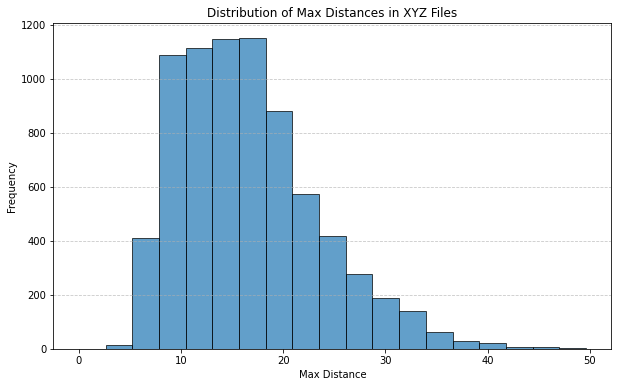

In [8]:
# Plot the distribution of max distances
max_distances = list(results.values())

plt.figure(figsize=(10, 6))
plt.hist(max_distances, bins=np.linspace(0, max(max_distances), 20), edgecolor='black', alpha=0.7)
plt.xlabel("Max Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Max Distances in XYZ Files")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
# maximum distance of the points in the convex hull and the corresponding file
max_file = max(results, key=results.get)
max_file, results[max_file]

('4e0vB.xyz', 49.63821376721769)

# pocket sequence diversity with MMseq2
pocket: residues around 6A of ligand

In [1]:
import pandas as pd

# load the result of MMseq2 clustering
df = pd.read_csv("/Users/yanyz/data/TOUGH-M1/scripts/data/clusterRes_cluster.tsv", sep="\t", header=None)
unique_count = df[0].nunique()
print(unique_count)

6063


In [2]:
most_common = df[0].value_counts().idxmax()  
most_common_count = df[0].value_counts().max() 

print("cluster with most sequences:", most_common)
print("number of sequences in this cluster:", most_common_count)

cluster with most sequences: 1vsvA_pocket:A
number of sequences in this cluster: 22


In [3]:
value_counts = df[0].value_counts()
value_counts

0
1vsvA_pocket:A    22
3q67B_pocket:B    19
4tsmC_pocket:C    16
3tsoA_pocket:A    15
3rgsD_pocket:D    14
                  ..
3n8rA_pocket:A     1
1z0uB_pocket:B     1
4xulA_pocket:A     1
3phdB_pocket:B     1
4r5eA_pocket:A     1
Name: count, Length: 6063, dtype: int64

In [9]:
import plotly.express as px


# count the occurrences of each unique value in the first column
value_counts = df[0].value_counts()

# filter to keep only those with count greater than 1
filtered_counts = value_counts[value_counts > 1]

#  create a bar chart using Plotly Express
fig = px.bar(
    x=filtered_counts.index, 
    y=filtered_counts.values,
    labels={'x': "Cluster size", 'y': "Count"},
    title="Distribution of Cluster Sizes (only clusters with more than one sequence)",
)

# hide x-axis labels and rotate them for better visibility
fig.update_layout(xaxis_tickangle=-90, xaxis_showticklabels=False)

fig.show()


## study of the largest cluster `1vsv`

In [10]:
# show the cluster with the most members
cluster_1vsvA = df[df[0] == most_common][1].to_list()
cluster_1vsvA

['1vsvA_pocket:A',
 '4k9dA_pocket:A',
 '3sthA_pocket:A',
 '3e5rC_pocket:C',
 '3pfwB_pocket:B',
 '2ep7B_pocket:B',
 '4wncA_pocket:A',
 '1cerH_pocket:H',
 '4boyA_pocket:A',
 '3docD_pocket:D',
 '2pkrK_pocket:K',
 '2b4rC_pocket:C',
 '4qx6C_pocket:C',
 '3hjaC_pocket:C',
 '3gnqG_pocket:G',
 '1gaeB_pocket:B',
 '1ihxA_pocket:A',
 '1nptC_pocket:C',
 '3l0dB_pocket:B',
 '3vazA_pocket:A',
 '1hdgB_pocket:B',
 '3b20D_pocket:D']

In [ ]:
# print the sequence of the cluster 1vsvA
def extract_sequences(fasta_file, target_names):   
    # extract sequences from the FASTA file that match the target names
    selected_sequences = []
    with open(fasta_file, 'r') as f:
        sequence_id = None
        sequence_data = []
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if sequence_id and sequence_id in target_names:
                    selected_sequences.append((sequence_id, ''.join(sequence_data)))
                sequence_id = line[1:].split()[0]
                sequence_data = []
            else:
                sequence_data.append(line)
        if sequence_id and sequence_id in target_names:
            selected_sequences.append((sequence_id, ''.join(sequence_data)))
    
    for seq_id, seq in selected_sequences:
        print(f">{seq_id}\n{seq}")

fasta_file = "/Users/yanyz/data/TOUGH-M1/scripts/data/all_pocket_seq.fasta"  

extract_sequences(fasta_file, cluster_1vsvA)

>3b20D_pocket:D
NGFGRIGRNNTSDRNSTGVFVTAPASCTHTLNNEY
>3docD_pocket:D
NGFGRIGRNDLVRNPECTGIFTSAPASCHTGDNNEF
>4k9dA_pocket:A
NGFGRIGRNDPFIMSKDPIESTGVFTSAPASCHTATDNEY
>2ep7B_pocket:B
NGFGRIGRNDLQKDPEATGVFRTAPASCHTNDDNEY
>3pfwB_pocket:B
NGFGRIGRNDPFIMCKEPESTGVYLSAPASCHTATDNEY
>2b4rC_pocket:C
NGFGRIGRNDPFMEKESTGVFLSAPASCTHASTANEY
>1cerH_pocket:H
NGFGRIGRNDLTVKDPESTGVFTTAPASCHTNNEY
>3l0dB_pocket:B
NGFGRIGRNDLGERDPECTGIFTSAPASCTHTGNNEF
>4qx6C_pocket:C
NGFGRIGRNDLTLEREPIEATGFFATAPASCHTGTNEY
>3gnqG_pocket:G
NGYGRIGRNDLGNRNECTGFFTSAPASCHTNDNNEF
>1gaeB_pocket:B
NGFGRIGRNDLLMERDEATGLFLTGPASCHTATEY
>3e5rC_pocket:C
NGFGRIGRNDPFIMIRNPSTGVFTSAPASCTHTATDNEY
>1ihxA_pocket:A
NGFGRIGRNDPFIEMKPSTGVFSAPACTATY
>2pkrK_pocket:K
NGFGRIGRNDTGQDRNPEGTGVFVTAPASCHTGNNEY
>4boyA_pocket:A
NGFGRIGRNDTSNDRNPEATGVFTTAPASCHTGDNNEY
>1nptC_pocket:C
NGFGRIGRNDLLERDPESTGRFTSAPASAHSTNDNNEY
>4wncA_pocket:A
NGFGRIGRNDPFIERDPESTGVFTSAPASCHTATNNEY
>1hdgB_pocket:B
NGFGRIGRNDLLEPDESTGVFRTAPASCHTNDDNEY
>1vsvA_pocket:A
NGFGRIGRNDPFMAKDP

Clustal Omega's alignment for 1vsvA cluster:

CLUSTAL O(1.2.4) multiple sequence alignment

```
3vazA_pocket:A      NGFGRIGRNDLTE-P---DECTGFYTISAPASCHTGD--TNEY	37  
1nptC_pocket:C      NGFGRIGRNDLLERD---PESTGRFT-SAPASAHSTN-DNNEY	38  
3l0dB_pocket:B      NGFGRIGRNDLGERD---PECTGIFT-SAPASCTHTG--NNEF	37  
3docD_pocket:D      NGFGRIGRNDLVR-N---PECTGIFT-SAPASCHTGD--NNEF	36  
3gnqG_pocket:G      NGYGRIGRNDLGN-R---NECTGFFT-SAPASCHTND--NNEF	36  
1gaeB_pocket:B      NGFGRIGRNDLLMER---DEATGLFL-TGPASCHTAT-E-Y--	35  
1cerH_pocket:H      NGFGRIGRNDLTVKD---PESTGVFT-TAPASCHTNN-E-Y--	35  
2ep7B_pocket:B      NGFGRIGRNDLQ-KD---PEATGVFR-TAPASCHTND-D-NEY	36  
1hdgB_pocket:B      NGFGRIGRNDLL-EP---DESTGVFR-TAPASCHTND-D-NEY	36  
1ihxA_pocket:A      NGFGRIGRNDPFIEMK---PSTGVFS-APA--CTATY------	31  
3b20D_pocket:D      NGFGRIGRNNTSD-----RNSTGVFV-TAPASCTHTL--NNEY	35  
2b4rC_pocket:C      NGFGRIGRNDPFMEK-E---STGVFL-SAPASCTHASTA-NEY	37  
1vsvA_pocket:A      NGFGRIGRNDPFMAK-DPIESTGVFT-SAPASCTHLTANDNEY	41  
3sthA_pocket:A      NGFGRIGRNDPFMEK-EPIESTGIFL-SAPASCH-MTANDNEY	40  
4qx6C_pocket:C      NGFGRIGRNDLTLER-EPIEATGFFA-TAPASCH-TG-TNEY-	38  
2pkrK_pocket:K      NGFGRIGRNDTGQDRN--PEGTGVFV-TAPASCH-TG-NNEY-	37  
4boyA_pocket:A      NGFGRIGRNDTSNDRN--PEATGVFT-TAPASCH-TG-DNNEY	38  
3hjaC_pocket:C      NGFGRIGRNDLTLERD--PESTGVFT-VA--SCH-TN-DTNEY	36  
3e5rC_pocket:C      NGFGRIGRNDPFIMIRNP--STGVFT-SAPASCTHTA-TDNEY	39  
4wncA_pocket:A      NGFGRIGRNDPFIERD--PESTGVFT-SAPASCH-TA-TNNEY	38  
4k9dA_pocket:A      NGFGRIGRNDPFIMSKDPIESTGVFT-SAPASCH-TA-TDNEY	40  
3pfwB_pocket:B      NGFGRIGRNDPFIMCKEP-ESTGVYL-SAPASCH-TA-TDNEY	39  
                    **:******:           ** :       .          
```

### check if the whole sequences of 1vsv cluster are also homologous

#### get sequence of the cluster 1vsvA


In [12]:
import sys
import os
import re

# Mapping of three-letter amino acid codes to one-letter codes
aa3to1 = {
    'ALA': 'A', 'VAL': 'V', 'PHE': 'F', 'PRO': 'P', 'MET': 'M',
    'ILE': 'I', 'LEU': 'L', 'ASP': 'D', 'GLU': 'E', 'LYS': 'K',
    'ARG': 'R', 'SER': 'S', 'THR': 'T', 'TYR': 'Y', 'HIS': 'H',
    'CYS': 'C', 'ASN': 'N', 'GLN': 'Q', 'TRP': 'W', 'GLY': 'G',
    'MSE': 'M',  # Selenomethionine treated as Methionine
}

# Regular expression pattern to match CA atoms in PDB files
ca_pattern = re.compile(r"^(ATOM|HETATM)\s+\d+\s+CA\s+[A-Z]?\s*([A-Z]{3})\s([\s\w])")

def parse_pdb(pdb_path):
    """
    Parses a PDB file and extracts chain sequences.
    """
    chain_dict = {}
    chain_list = []
    try:
        with open(pdb_path, 'r') as fp:
            for line in fp:
                if line.startswith("ENDMDL"):  # Stop processing after the first model
                    break
                match = ca_pattern.match(line)
                if match:
                    resn, chain = match.group(2), match.group(3).strip()
                    if resn in aa3to1:
                        if chain in chain_dict:
                            chain_dict[chain] += aa3to1[resn]
                        else:
                            chain_dict[chain] = aa3to1[resn]
                            chain_list.append(chain)
        return chain_dict, os.path.basename(pdb_path).split('.')[0]
    except FileNotFoundError:
        sys.stderr.write(f"Error: File {pdb_path} not found.\n")
        return None, None
    except Exception as e:
        sys.stderr.write(f"Error processing {pdb_path}: {e}\n")
        return None, None

def pdb_to_fasta(pdb_file, output_file=None):
    """Converts a single PDB file into FASTA format."""
    chain_dict, fasta_header = parse_pdb(pdb_file)
    if chain_dict is None:
        return
    
    if output_file:
        with open(output_file, 'a') as output:
            for chain, sequence in chain_dict.items():
                output.write(f">{fasta_header}:{chain}\n{sequence}\n")
    else:
        for chain, sequence in chain_dict.items():
            sys.stdout.write(f">{fasta_header}:{chain}\n{sequence}\n")

In [13]:
from pathlib import Path

toughm1_folder = Path("/Users/yanyz/data/TOUGH-M1//TOUGH-M1_dataset")
for pocket in cluster_1vsvA:
    pdbid = pocket.split("_")[0]
    pdbpath = toughm1_folder / pdbid / f"{pdbid}.pdb"
    pdb_to_fasta(pdbpath, output_file="cluster_1vsv.fasta")

### draw pairwise alignment similarity heatmap

/opt/anaconda3/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning:

Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.



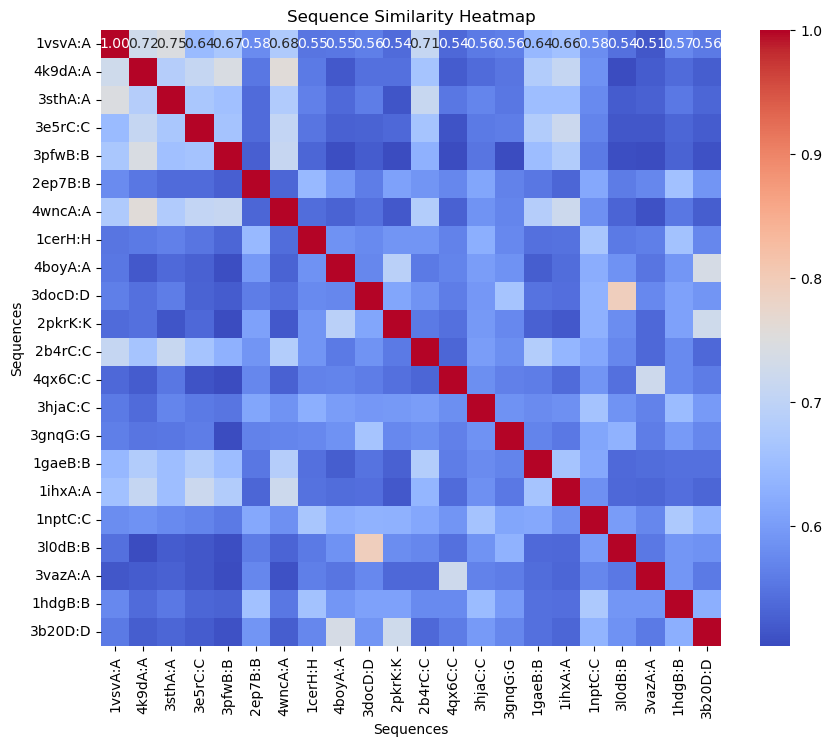

In [ ]:
from Bio import SeqIO
from Bio import pairwise2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def compute_similarity_matrix(sequences):
    num_sequences = len(sequences)
    similarity_matrix = np.zeros((num_sequences, num_sequences))
    
    for i in range(num_sequences):
        for j in range(i, num_sequences): 
            if i == j:
                similarity_matrix[i, j] = 1.0 
            else:
                alignment = pairwise2.align.globalxx(sequences[i], sequences[j], score_only=True)
                max_length = max(len(sequences[i]), len(sequences[j]))
                similarity_score = alignment / max_length 
                similarity_matrix[i, j] = similarity_score
                similarity_matrix[j, i] = similarity_score 
    
    return similarity_matrix

def plot_heatmap(similarity_matrix, sequence_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=sequence_ids, yticklabels=sequence_ids, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Sequence Similarity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

if __name__ == "__main__":
    fasta_path = "/Users/yanyz/data/TOUGH-M1/scripts/data/cluster_1vsv.fasta"
    sequences = []
    sequence_ids = []
    
    for record in SeqIO.parse(fasta_path, "fasta"):
        sequences.append(str(record.seq))
        sequence_ids.append(record.id)
    
    similarity_matrix = compute_similarity_matrix(sequences)
    plot_heatmap(similarity_matrix, sequence_ids)


### Visualize structure in pymol
with script `visualize_pdbs_pymol.py`

### are cluster 1vsv positive or negative ?

In [15]:
cluster_1vsvA = [
    '1vsvA',
    '4k9dA',
    '3sthA',
    '3e5rC',
    '3pfwB',
    '2ep7B',
    '4wncA',
    '1cerH',
    '4boyA',
    '3docD',
    '2pkrK',
    '2b4rC',
    '4qx6C',
    '3hjaC',
    '3gnqG',
    '1gaeB',
    '1ihxA',
    '1nptC',
    '3l0dB',
    '3vazA',
    '1hdgB',
    '3b20D',
]

In [16]:
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)
positive.shape, negative.shape

((505116, 5), (556810, 5))

In [17]:
# draw distribution of seq_id_prot
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column):
    """
    draw the distribution of a specified column in a pandas DataFrame.
    :param df: pandas DataFrame
    :param column: name of the column to plot
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()

In [18]:
import plotly.express as px
import pandas as pd

def plot_distribution_interactive(df, column, nbins=30):
    """
    draw the distribution of a specified column in a pandas DataFrame using Plotly.
    :param df: pandas DataFrame
    :param column: name of the column to plot
    """
    fig = px.histogram(df, x=column, nbins=nbins, marginal="box", 
                        opacity=0.7, title=f"Distribution of {column}", 
                        histnorm='density')
    fig.update_traces(marker=dict(color='blue'))
    fig.update_layout(xaxis_title=column, yaxis_title="Density")
    fig.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



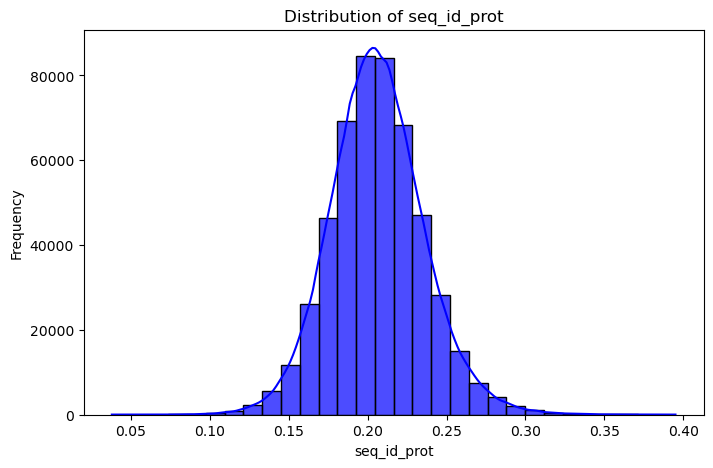

In [19]:
plot_distribution(positive, 'seq_id_prot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



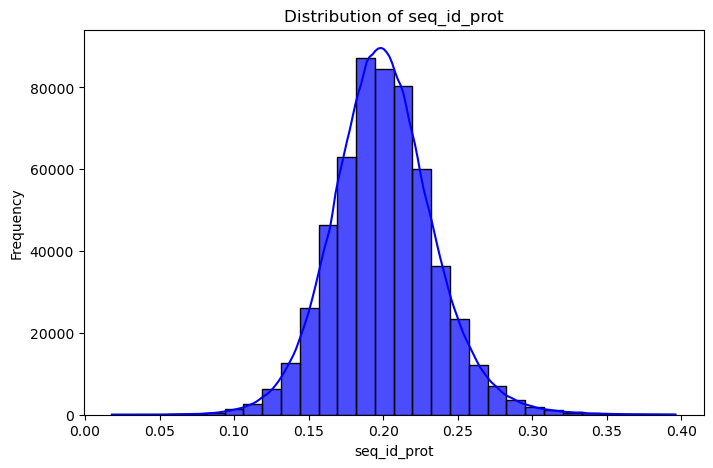

In [20]:
plot_distribution(negative, 'seq_id_prot')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



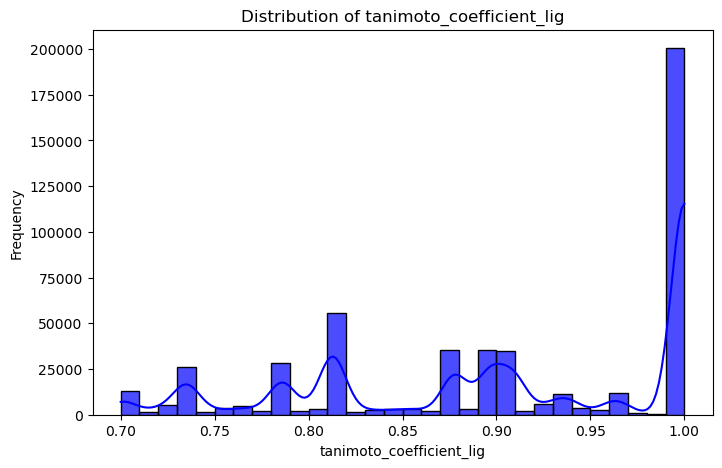

In [21]:
plot_distribution(positive, 'tanimoto_coefficient_lig')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



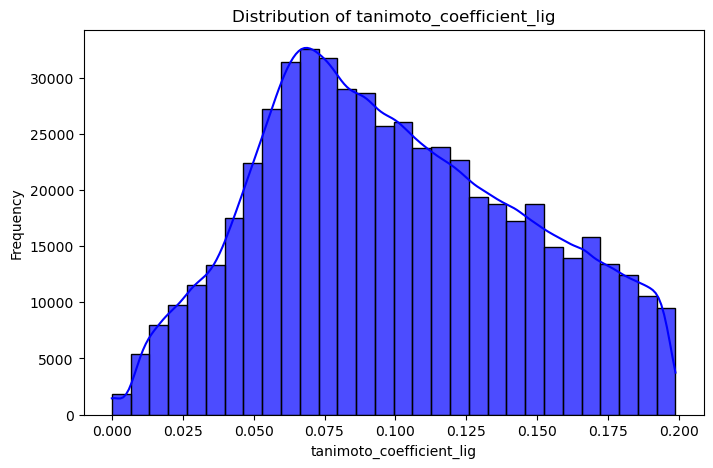

In [22]:
plot_distribution(negative, 'tanimoto_coefficient_lig')

In [23]:
# Filter DataFrame
df_cluster_1vsv_positive = positive[positive['pdb1'].isin(cluster_1vsvA) & positive['pdb2'].isin(cluster_1vsvA)]
df_cluster_1vsv_negative = negative[negative['pdb1'].isin(cluster_1vsvA) & negative['pdb2'].isin(cluster_1vsvA)]

# Print results
df_cluster_1vsv_positive

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig


In [24]:
df_cluster_1vsv_negative

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig


In [ ]:
# the occurrences of cluster 1vsvA in positive and negative datasets
positive[positive['pdb1'].isin(cluster_1vsvA) | positive['pdb2'].isin(cluster_1vsvA)]

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig
236647,3hudA,3b20D,0.208,0.32688,1.000000
236654,3hudA,1nptC,0.230,0.33236,1.000000
236655,3hudA,3l0dB,0.237,0.33047,1.000000
236659,3hudA,4qx6C,0.249,0.33199,1.000000
236663,3hudA,1cerH,0.222,0.33257,1.000000
...,...,...,...,...,...
497521,1ihxA,4na4C,0.226,0.28846,0.918919
497522,1ihxA,5j23D,0.186,0.36373,0.809524
497523,1ihxA,1yonA,0.180,0.39675,0.809524
497524,1ihxA,2wzmB,0.212,0.36967,0.829268


In [26]:
negative[negative['pdb1'].isin(cluster_1vsvA) | negative['pdb2'].isin(cluster_1vsvA)]

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig


conclusion: pdb in cluster 1vsvA occurs many times in positive set, but never in negative set. this shows the imbalance of the dataset.

In [27]:
cluster_dict = {}

with open('/Users/yanyz/data/TOUGH-M1/scripts/data/clusterRes_cluster.tsv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line_list = line.strip().split()  # Print each line without newline character
        representative = line_list[0].split("_")[0]
        member = line_list[1].split("_")[0]
        
        # If the representative is not already a key, initialize with an empty list
        if representative not in cluster_dict:
            cluster_dict[representative] = []
        
        # Append the member to the representative's list
        cluster_dict[representative].append(member)

# Print the cluster dictionary
for representative, member in cluster_dict.items():
    print(f"{representative}: {member}")

3la6I: ['3la6I']
4wswF: ['4wswF']
3g6vA: ['3g6vA', '4r8uA']
2x6yA: ['2x6yA']
3tqlA: ['3tqlA']
3wcwG: ['3wcwG']
2vdyB: ['2vdyB']
3h83B: ['3h83B']
2rfyA: ['2rfyA']
1bagA: ['1bagA']
3v2bA: ['3v2bA']
4pc1C: ['4pc1C']
4nxqB: ['4nxqB']
3q71A: ['3q71A']
4u8uO: ['4u8uO']
5eweA: ['5eweA']
3cvnA: ['3cvnA', '1fchB', '4eqfA']
4obuF: ['4obuF']
3wmxD: ['3wmxD']
5hrcB: ['5hrcB']
2ejkA: ['2ejkA']
3uedA: ['3uedA']
1h4xB: ['1h4xB']
4s2tB: ['4s2tB']
3adpA: ['3adpA']
3v68A: ['3v68A']
4dayA: ['4dayA']
1xu3B: ['1xu3B']
1p22A: ['1p22A']
1piwB: ['1piwB']
4ru1D: ['4ru1D']
3wsgA: ['3wsgA']
4eh1A: ['4eh1A']
1ipbA: ['1ipbA']
1vdnA: ['1vdnA']
4gl8A: ['4gl8A']
5fhiA: ['5fhiA']
3elbA: ['3elbA']
4uapA: ['4uapA']
4yhfA: ['4yhfA']
2am3A: ['2am3A']
4g68A: ['4g68A']
5dvaC: ['5dvaC']
4z4pA: ['4z4pA']
2e4vA: ['2e4vA']
4ofkA: ['4ofkA']
4fe7A: ['4fe7A']
1r9qA: ['1r9qA']
2gaoA: ['2gaoA']
3p13A: ['3p13A']
2ei1A: ['2ei1A']
2yepC: ['2yepC']
4hrhA: ['4hrhA']
1vkfD: ['1vkfD']
1ux8A: ['1ux8A']
3rcmA: ['3rcmA']
3tvlA: ['3tvlA']
4txj

In [28]:
# number of clusters
len(cluster_dict)

6063

In [ ]:
# Find the key with the longest list
longest_key = max(cluster_dict, key=lambda k: len(cluster_dict[k]))
longest_list = cluster_dict[longest_key]

print(f"Representative with the most members: {longest_key}")
print(f"Number of members: {len(longest_list)}")
print(f"Members: {longest_list}")


Representative with the most members: 1vsvA
Number of members: 22
Members: ['1vsvA', '4k9dA', '3sthA', '3e5rC', '3pfwB', '2ep7B', '4wncA', '1cerH', '4boyA', '3docD', '2pkrK', '2b4rC', '4qx6C', '3hjaC', '3gnqG', '1gaeB', '1ihxA', '1nptC', '3l0dB', '3vazA', '1hdgB', '3b20D']


In [ ]:
# Find the key with more than 1 members
more_than_one = {k: v for k, v in cluster_dict.items() if len(v) > 1}
print(f"Representatives with more than 1 members: {more_than_one.keys()}")
print(f"Number of representatives with more than 1 members: {len(more_than_one)}")

Representatives with more than 1 members: dict_keys(['3g6vA', '3cvnA', '4ba5A', '4eeuA', '3fzpA', '2vchA', '2ag5D', '4x6jA', '4nteA', '2hunA', '3ppuA', '3zlbA', '1o8vA', '2avdB', '4ed4A', '3mw3A', '3v5wA', '1sbfA', '1o2dB', '2qbwA', '2y08B', '1v4xA', '5b8fC', '3bu0A', '4ei7A', '3exhC', '1j1wB', '3aq9B', '1rkxB', '4ia1A', '4qpnA', '5c9aA', '1gsuA', '4cymB', '1ipeB', '3qhnA', '3qq3A', '3fw3B', '1vfvA', '2zkjB', '1m8pB', '1v8kA', '4p6xC', '3smaA', '4kmgA', '3oriB', '4k2xB', '4mitD', '5idwA', '3mjeA', '5efqA', '3twwB', '1g99A', '4fosA', '1ogkC', '3racA', '4p4sA', '4tsmC', '2cfoA', '2y0dA', '3qnrC', '1n06B', '5i1fA', '1pzfC', '1p5jA', '3tktA', '2ijmB', '3e0nA', '3c3xA', '4dmgB', '2gqtA', '4yagA', '1ya3C', '3il4C', '4v1cK', '3p0xA', '3e27C', '1in6A', '1tl9A', '3unfH', '4wpzA', '4f0tA', '5dbfB', '4n17A', '1gz6D', '2yxxA', '4ckiA', '3i0pA', '1pfbA', '2gkeA', '2bneA', '4driA', '3rkuA', '1z37A', '1wp4A', '1w4rH', '2eq9G', '3t94A', '2pkaD', '4kvzA', '4v94T', '3tjrA', '2ytzB', '4gekA', '4u8uE', '4

## proteins that don't belong to any cluster


In [ ]:
# check the cluster with only one member if the member is the same as the representative
one_member = {k: v for k, v in cluster_dict.items() if len(v) == 1}
for representative, member in one_member.items():
    if representative != member[0]:
        print(representative, member[0])

# ok

In [ ]:
one_member

{'3la6I': ['3la6I'],
 '4wswF': ['4wswF'],
 '2x6yA': ['2x6yA'],
 '3tqlA': ['3tqlA'],
 '3wcwG': ['3wcwG'],
 '2vdyB': ['2vdyB'],
 '3h83B': ['3h83B'],
 '2rfyA': ['2rfyA'],
 '1bagA': ['1bagA'],
 '3v2bA': ['3v2bA'],
 '4pc1C': ['4pc1C'],
 '4nxqB': ['4nxqB'],
 '3q71A': ['3q71A'],
 '4u8uO': ['4u8uO'],
 '5eweA': ['5eweA'],
 '4obuF': ['4obuF'],
 '3wmxD': ['3wmxD'],
 '5hrcB': ['5hrcB'],
 '2ejkA': ['2ejkA'],
 '3uedA': ['3uedA'],
 '1h4xB': ['1h4xB'],
 '4s2tB': ['4s2tB'],
 '3adpA': ['3adpA'],
 '3v68A': ['3v68A'],
 '4dayA': ['4dayA'],
 '1xu3B': ['1xu3B'],
 '1p22A': ['1p22A'],
 '1piwB': ['1piwB'],
 '4ru1D': ['4ru1D'],
 '3wsgA': ['3wsgA'],
 '4eh1A': ['4eh1A'],
 '1ipbA': ['1ipbA'],
 '1vdnA': ['1vdnA'],
 '4gl8A': ['4gl8A'],
 '5fhiA': ['5fhiA'],
 '3elbA': ['3elbA'],
 '4uapA': ['4uapA'],
 '4yhfA': ['4yhfA'],
 '2am3A': ['2am3A'],
 '4g68A': ['4g68A'],
 '5dvaC': ['5dvaC'],
 '4z4pA': ['4z4pA'],
 '2e4vA': ['2e4vA'],
 '4ofkA': ['4ofkA'],
 '4fe7A': ['4fe7A'],
 '1r9qA': ['1r9qA'],
 '2gaoA': ['2gaoA'],
 '3p13A': ['3

In [ ]:
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)

In [ ]:
# Positive data points that don’t contain any proteins from the 746 clusters
df_one_member_pos = positive[positive['pdb1'].isin(one_member.keys()) & positive['pdb2'].isin(one_member.keys())]
df_one_member_neg = negative[negative['pdb1'].isin(one_member.keys()) & negative['pdb2'].isin(one_member.keys())]
df_one_member_pos

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig
1294,3ug7D,3zl8A,0.198,0.34367,1.000000
1295,3ug7D,4dz6A,0.197,0.28797,1.000000
1296,3ug7D,2j9dJ,0.206,0.34010,1.000000
1297,3ug7D,4yj1A,0.226,0.30387,1.000000
1298,3ug7D,4dcaA,0.215,0.27949,1.000000
...,...,...,...,...,...
505109,2xs4A,4fgaA,0.175,0.39256,0.785714
505111,1gaxD,3ruxA,0.182,0.32836,0.700000
505112,4yrdA,2y9xA,0.209,0.26290,0.750000
505113,4g4jA,1h41B,0.203,0.35601,0.812500


In [ ]:
# Negative data points that don’t contain any proteins from the 746 clusters
df_one_member_neg

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig
1792,1lh2A,3f8dC,0.196,0.30936,0.067416
1794,1lh2A,4lrtD,0.188,0.35555,0.058824
1795,1lh2A,2gbbD,0.194,0.32861,0.100000
1796,1lh2A,3rq1B,0.168,0.37380,0.108696
1798,1lh2A,2kr2A,0.248,0.31958,0.083333
...,...,...,...,...,...
556805,4rwaB,2vu9A,0.185,0.26473,0.070312
556806,4rwaB,1w9xA,0.208,0.26563,0.057554
556807,4qqcA,2vu9A,0.168,0.32373,0.080000
556808,4qqcA,1w9xA,0.202,0.31928,0.050725


## study of 746 'more_than_one' clusters (which contains more than 1 member)

In [ ]:
more_than_one

{'3g6vA': ['3g6vA', '4r8uA'],
 '3cvnA': ['3cvnA', '1fchB', '4eqfA'],
 '4ba5A': ['4ba5A', '2eo5A', '3bs8A', '2e7uA', '1szuD', '2epjA'],
 '4eeuA': ['4eeuA', '5a8bA', '1g28A', '2v0uA', '2pr5A'],
 '3fzpA': ['3fzpA', '1jqhC'],
 '2vchA': ['2vchA', '4whmA', '2acwA', '3hbjA'],
 '2ag5D': ['2ag5D',
  '3a28G',
  '4nbwC',
  '4fn4B',
  '3wyeA',
  '1gegH',
  '4nbuA',
  '1h5qD',
  '2gdzA'],
 '4x6jA': ['4x6jA', '3bpmA', '2bdzB', '2preA', '1padA', '3bpfC', '3ioqA'],
 '4nteA': ['4nteA', '3fbsA'],
 '2hunA': ['2hunA', '1bxkB', '1g1aB'],
 '3ppuA': ['3ppuA', '3r3eA'],
 '3zlbA': ['3zlbA', '13pkD', '1vjcA', '1phpA', '4feyA', '4ng4B'],
 '1o8vA': ['1o8vA', '1pmpB', '1vyfA'],
 '2avdB': ['2avdB', '3tr6A'],
 '4ed4A': ['4ed4A', '3pyfA'],
 '3mw3A': ['3mw3A', '3mw2A'],
 '3v5wA': ['3v5wA', '4tndA', '4yhjB', '3qc9C'],
 '1sbfA': ['1sbfA', '3ul2D', '1lu2B'],
 '1o2dB': ['1o2dB', '5br4B', '3ox4C'],
 '2qbwA': ['2qbwA', '1n7tA'],
 '2y08B': ['2y08B', '2wdwB', '3popB'],
 '1v4xA': ['1v4xA', '1t1nA'],
 '5b8fC': ['5b8fC', '3t80B'

In [ ]:
df_more_than_one_pos = positive[positive['pdb1'].isin(more_than_one.keys()) | positive['pdb2'].isin(more_than_one.keys())]
df_more_than_one_neg = negative[negative['pdb1'].isin(more_than_one.keys()) | negative['pdb2'].isin(more_than_one.keys())]

# Positive data points that don’t contain any proteins from the 746 clusters
df_more_than_one_pos

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig
26,1lkxD,4v94P,0.201,0.28832,1.000000
37,1lkxD,5efqA,0.210,0.34424,1.000000
54,1lkxD,1z2nA,0.224,0.39855,1.000000
84,1lkxD,1xmvA,0.205,0.34174,1.000000
96,1lkxD,2ijmB,0.216,0.35695,1.000000
...,...,...,...,...,...
505077,3cvnA,2pkuA,0.157,0.31076,0.755556
505096,4qu3A,3zgpA,0.226,0.34419,0.969697
505106,3zvxA,1vbpA,0.222,0.37324,0.717391
505110,3deqC,1ta9A,0.220,0.27385,0.785714


In [ ]:
# Negative data points that don’t contain any proteins from the 746 clusters
df_more_than_one_neg

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig
7,1lkxD,4gmeB,0.212,0.29633,0.025641
9,1lkxD,4ojmA,0.165,0.33038,0.142857
18,1lkxD,3tteA,0.196,0.31617,0.151515
19,1lkxD,4qidA,0.171,0.39255,0.119048
28,1lkxD,1jgiA,0.222,0.29997,0.190476
...,...,...,...,...,...
556744,2srtA,2ghqA,0.142,0.33205,0.187500
556745,2srtA,2p3dB,0.160,0.33749,0.188235
556746,2srtA,4qqcA,0.209,0.34948,0.154930
556747,2srtA,2vu9A,0.167,0.34129,0.078947


In [ ]:
# flatten the dictionary
def flatten_dict(d):
    """Flatten a dictionary of lists into a single list with unique value."""
    output = []
    for key, sublist in d.items():
        output.append(key)
        for item in sublist:
            output.append(item)
    return list(set(output))

# Example usage
my_dict = {"a": [1, 2, 3], "b": [11, 2, 3], "c": [3]}
flatten_dict(my_dict)

[1, 2, 3, 'c', 'a', 'b', 11]

In [ ]:
more_than_one_list = flatten_dict(more_than_one)
print(f"Number of unique representatives in more_than_one set: {len(more_than_one_list)}")


Number of unique representatives in more_than_one set: 2207


## check if there are proteins from same cluster in positive or negative list

In [ ]:
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)

In [ ]:
for representative, members in more_than_one.items():
    # Filter DataFrame
    df_cluster_positive = positive[positive['pdb1'].isin(members) & positive['pdb2'].isin(members)]
    df_cluster_negative = negative[negative['pdb1'].isin(members) & negative['pdb2'].isin(members)]

    if df_cluster_positive.shape[0] > 0 & df_cluster_negative.shape[0] > 0:
        print(f"Positive: {df_cluster_positive.shape[0]}")
        print(f"Negative: {df_cluster_negative.shape[0]}")

## check how many times the 2207 proteins in cluster are in positive or negative lists

In [ ]:
cluster_pos_neg = {} # clusters in both positive and negative list
cluster_pos_neg_number = {} # number entries in both positive and negative 
for representative, members in more_than_one.items():
    # Filter DataFrame
    df_cluster_positive = positive[positive['pdb1'].isin(members) | positive['pdb2'].isin(members)]
    df_cluster_negative = negative[negative['pdb1'].isin(members) | negative['pdb2'].isin(members)]

    if df_cluster_positive.shape[0] > 0 and df_cluster_negative.shape[0] > 0: # if cluster members both exist in positive and negative
        print(f"{representative} Positive: {df_cluster_positive.shape[0]}\tNegative: {df_cluster_negative.shape[0]}")
        cluster_pos_neg[representative] = members
        cluster_pos_neg_number[representative] = [df_cluster_positive.shape[0], df_cluster_negative.shape[0]]
print(f"Number of clusters with both positive and negative: {len(cluster_pos_neg)}")

3cvnA Positive: 1	Negative: 2413
4ba5A Positive: 307	Negative: 905
4x6jA Positive: 7	Negative: 1820
3mw3A Positive: 8	Negative: 1089
3v5wA Positive: 1997	Negative: 912
1gsuA Positive: 22	Negative: 835
3fw3B Positive: 3	Negative: 985
5efqA Positive: 989	Negative: 1035
3racA Positive: 123	Negative: 908
1p5jA Positive: 468	Negative: 796
3e0nA Positive: 1	Negative: 4353
1tl9A Positive: 4	Negative: 788
1pfbA Positive: 1	Negative: 1013
4driA Positive: 2	Negative: 1188
1z37A Positive: 143	Negative: 845
1jgiA Positive: 14	Negative: 783
4zg4A Positive: 8216	Negative: 878
4bwxA Positive: 580	Negative: 978
3fvlB Positive: 34	Negative: 1345
1t3qF Positive: 338	Negative: 1090
3emzA Positive: 137	Negative: 901
3nd1A Positive: 481	Negative: 976
2ofbB Positive: 7	Negative: 927
3q9cE Positive: 8	Negative: 858
3wqzA Positive: 34	Negative: 900
4d4gA Positive: 1016	Negative: 996
2p2vA Positive: 6	Negative: 1070
4tx9A Positive: 1	Negative: 905
3deqC Positive: 4	Negative: 747
5dvjB Positive: 234	Negative: 7

In [ ]:
df_cluster_pos_neg_number = pd.DataFrame(cluster_pos_neg_number).T
df_cluster_pos_neg_number

,0,1
3cvnA,1,2413
4ba5A,307,905
4x6jA,7,1820
3mw3A,8,1089
3v5wA,1997,912
...,...,...
1jubA,120,904
3q5lA,786,1130
3b9aA,6,972
4ojmA,56,647


In [ ]:
plot_distribution_interactive(df_cluster_pos_neg_number, 0, 1000)

In [ ]:
plot_distribution_interactive(df_cluster_pos_neg_number, 1, 100)

In [ ]:
df_cluster_pos_neg_number[0].sum(), df_cluster_pos_neg_number[1].sum()

(23483, 85289)

In [ ]:
df_cluster_positive

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig
1226,2qenA,3bc1A,0.191,0.36230,0.735294
1236,2qenA,4lhwB,0.194,0.37663,0.735294
3221,4dz6A,3bc1A,0.162,0.30605,0.735294
3231,4dz6A,4lhwB,0.282,0.30478,0.735294
4437,2j9dJ,3bc1A,0.159,0.33640,0.735294
...,...,...,...,...,...
392495,1zbdA,4qz9A,0.235,0.34262,0.735294
392496,1zbdA,4bwmA,0.161,0.36202,0.735294
392497,1zbdA,4k4yM,0.245,0.34782,0.735294
392498,1zbdA,1w4rH,0.229,0.37301,0.742857


In [ ]:
df_cluster_negative

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig


# occurence of each protein of Tough-m1 in positive and negative set

In [29]:
import pandas as pd

colnames=['pdb1', 'pdb2', 'seq_id_prot', 'tm-score_prot', 'tanimoto_coefficient_lig'] 
positive = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_positive.list', sep=' ', header=None, names=colnames)
negative = pd.read_csv('/Users/yanyz/data/TOUGH-M1/TOUGH-M1_negative.list', sep=' ', header=None, names=colnames)
df = pd.concat([positive, negative], axis=0)

# add a column to indicate if the entry is positive or negative depending on the tanimoto_coefficient_lig
df['pos_neg'] = df['tanimoto_coefficient_lig'].apply(lambda x: 1 if x > 0.5 else 0)
df

,pdb1,pdb2,seq_id_prot,tm-score_prot,tanimoto_coefficient_lig,pos_neg
0,1lkxD,2qenA,0.202,0.33914,1.000000,1
1,1lkxD,3zl8A,0.191,0.31224,1.000000,1
2,1lkxD,4dz6A,0.203,0.33353,1.000000,1
3,1lkxD,2j9dJ,0.216,0.37152,1.000000,1
4,1lkxD,4yj1A,0.151,0.27935,1.000000,1
...,...,...,...,...,...,...
556805,4rwaB,2vu9A,0.185,0.26473,0.070312,0
556806,4rwaB,1w9xA,0.208,0.26563,0.057554,0
556807,4qqcA,2vu9A,0.168,0.32373,0.080000,0
556808,4qqcA,1w9xA,0.202,0.31928,0.050725,0


## how many time each pdb occur in the pdb1 or pdb2 column


In [20]:
occurence_pdb1 = df['pdb1'].value_counts().reset_index()
occurence_pdb1.columns = ['pdb', 'count']
occurence_pdb2 = df['pdb2'].value_counts().reset_index()
occurence_pdb2.columns = ['pdb', 'count']

In [21]:
merge_df = pd.merge(occurence_pdb1, occurence_pdb2, on='pdb', how='outer', suffixes=('_pdb1', '_pdb2'))
# fillna with 0
merge_df = merge_df.fillna(0)
merge_df['count'] = merge_df['count_pdb1'] + merge_df['count_pdb2']
merge_df

,pdb,count_pdb1,count_pdb2,count
0,11asA,854.0,59.0,913.0
1,13pkD,567.0,43.0,610.0
2,154lA,5.0,0.0,5.0
3,1a05B,0.0,24.0,24.0
4,1a0iA,136.0,172.0,308.0
...,...,...,...,...
7519,6gsyB,8.0,2.0,10.0
7520,7aatA,45.0,26.0,71.0
7521,7acnA,0.0,113.0,113.0
7522,7stdB,564.0,379.0,943.0


In [22]:
# number of pdbs that appear only once
merge_df[merge_df['count'] == 1].shape[0]

185

In [32]:
# draw plot count - pdb, y-axis is count, x-axis is pdb name
import plotly.express as px

def plot_pdb_count(df, col='count'):
    df = df.sort_values(by=col, ascending=False).reset_index(drop=True)
    # Create interactive scatter plot
    fig = px.scatter(df, x=df.index, y=col, hover_name="pdb",
                    labels={"x": "PDB Number", "count": "Count"},
                    title="Interactive PDB Count Plot")

    # Customize hover info
    fig.update_traces(marker=dict(size=10), textposition="top center")

    # Show figure
    fig.show()

plot_pdb_count(merge_df, 'count')


# how many time each pdb occur in the positive or negative


In [3]:
# positive
occurence_pos_pdb1 = df[df['pos_neg'] == 1]['pdb1'].value_counts().reset_index()
occurence_pos_pdb1.columns = ['pdb', 'count_pos']
occurence_pos_pdb2 = df[df['pos_neg'] == 1]['pdb2'].value_counts().reset_index()
occurence_pos_pdb2.columns = ['pdb', 'count_pos']
occurence_pos = pd.merge(occurence_pos_pdb1, occurence_pos_pdb2, on='pdb', how='outer', suffixes=('_pdb1', '_pdb2'))
occurence_pos = occurence_pos.fillna(0)
occurence_pos['count_pos'] = occurence_pos['count_pos_pdb1'] + occurence_pos['count_pos_pdb2']
occurence_pos

,pdb,count_pos_pdb1,count_pos_pdb2,count_pos
0,11asA,7.0,0.0,7.0
1,13pkD,567.0,43.0,610.0
2,154lA,5.0,0.0,5.0
3,1a05B,0.0,24.0,24.0
4,1a0iA,136.0,172.0,308.0
...,...,...,...,...
6529,6a3hA,7.0,22.0,29.0
6530,6gsyB,8.0,2.0,10.0
6531,7aatA,45.0,26.0,71.0
6532,7acnA,0.0,113.0,113.0


In [4]:
# negative
occurence_neg_pdb1 = df[df['pos_neg'] == 0]['pdb1'].value_counts().reset_index()
occurence_neg_pdb1.columns = ['pdb', 'count_neg']
occurence_neg_pdb2 = df[df['pos_neg'] == 0]['pdb2'].value_counts().reset_index()
occurence_neg_pdb2.columns = ['pdb', 'count_neg']
occurence_neg = pd.merge(occurence_neg_pdb1, occurence_neg_pdb2, on='pdb', how='outer', suffixes=('_pdb1', '_pdb2'))
occurence_neg = occurence_neg.fillna(0)
occurence_neg['count_neg'] = occurence_neg['count_neg_pdb1'] + occurence_neg['count_neg_pdb2']
occurence_neg

,pdb,count_neg_pdb1,count_neg_pdb2,count_neg
0,11asA,847.0,59.0,906.0
1,1a6vD,344.0,298.0,642.0
2,1a8tA,632.0,352.0,984.0
3,1aimA,186.0,662.0,848.0
4,1apuA,42.0,746.0,788.0
...,...,...,...,...
1261,5jlaC,912.0,0.0,912.0
1262,5jp4A,298.0,509.0,807.0
1263,5k0sA,396.0,482.0,878.0
1264,5tmpA,34.0,824.0,858.0


In [ ]:
merge_df_pos_neg = pd.merge(occurence_pos, occurence_neg, on='pdb', how='outer', suffixes=('_pos', '_neg'))
merge_df_pos_neg = merge_df_pos_neg.fillna(0)
merge_df_pos_neg['count'] = merge_df_pos_neg['count_pos'] + merge_df_pos_neg['count_neg']
merge_df_pos_neg = merge_df_pos_neg[['pdb', 'count_pos', 'count_neg', 'count']]
merge_df_pos_neg

,pdb,count_pos,count_neg,count
0,11asA,7.0,906.0,913.0
1,13pkD,610.0,0.0,610.0
2,154lA,5.0,0.0,5.0
3,1a05B,24.0,0.0,24.0
4,1a0iA,308.0,0.0,308.0
...,...,...,...,...
7519,6gsyB,10.0,0.0,10.0
7520,7aatA,71.0,0.0,71.0
7521,7acnA,113.0,0.0,113.0
7522,7stdB,0.0,943.0,943.0


In [23]:
# number of proteins only appear once in positive
merge_df_pos_neg[merge_df_pos_neg['count_pos'] == 1].shape[0]

280

In [24]:
# number of proteins only appear once in negative
merge_df_pos_neg[merge_df_pos_neg['count_neg'] == 1].shape[0]

0

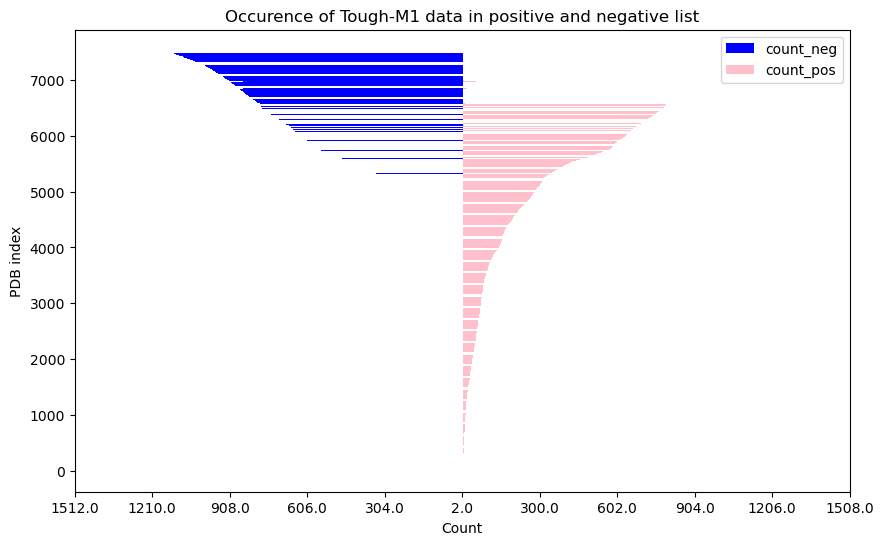

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def draw_pyramid_plot(df):
    # Sort DataFrame by total count to improve visualization
    df = df.sort_values(by="count", ascending=True)

    # Define y-axis positions
    y = np.arange(len(df))

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars: left (negative counts) and right (positive counts)
    ax.barh(y, -df['count_neg'], color='blue', label='count_neg')
    ax.barh(y, df['count_pos'], color='pink', label='count_pos')

    # Set labels and title
    ax.set_xlabel("Count")
    ax.set_ylabel("PDB index")
    ax.set_title("Occurence of Tough-M1 data in positive and negative list")

    # Customize x-axis ticks
    max_count = max(df['count'].max(), df['count_neg'].max(), df['count_pos'].max())
    ax.set_xticks(np.arange(-max_count, max_count + 1, max_count // 5))
    ax.set_xticklabels([f"{abs(x)}" for x in np.arange(-max_count, max_count + 1, max_count // 5)])

    # Add legend
    ax.legend(loc='upper right')

    # Show the plot
    plt.show()

draw_pyramid_plot(merge_df_pos_neg)

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
def draw_interactive_pyramid_plot_html(df):

    # Sort DataFrame by total count to improve visualization
    df = df.sort_values(by="count", ascending=True)

    # Define y-axis positions
    y = np.arange(len(df))

    # Create Plotly figure
    fig = go.Figure()

    # Add negative (left) bars
    fig.add_trace(go.Bar(
        y=y, 
        x=-df['count_neg'], 
        orientation='h', 
        name='count_neg', 
        marker=dict(color='blue'),
        hoverinfo='text',
        text=[f"PDB: {p}, Count Neg: {n}" for p, n in zip(df['pdb'], df['count_neg'])],  # Hover text
    ))

    # Add positive (right) bars
    fig.add_trace(go.Bar(
        y=y, 
        x=df['count_pos'], 
        orientation='h', 
        name='count_pos', 
        marker=dict(color='pink'),
        hoverinfo='text',
        text=[f"PDB: {p}, Count Pos: {n}" for p, n in zip(df['pdb'], df['count_pos'])],  # Hover text
    ))

    # Update layout
    fig.update_layout(
        title="Occurence of Tough-M1 data in positive and negative list",
        xaxis=dict(title="Count", showgrid=True),
        yaxis=dict(showticklabels=False),  # Hide y-axis labels
        barmode='relative',
        hovermode="y",
        plot_bgcolor="white",  # White background
        paper_bgcolor="white",  # White surrounding area
        font=dict(color="black")  # Black text for contra
    )

    # Save the figure as an HTML file and open it
    html_file = "data/interactive_pyramid.html"
    fig.write_html(html_file, auto_open=True)

    print(f"Interactive plot saved as {html_file} and opened in browser.")
draw_interactive_pyramid_plot_html(merge_df_pos_neg)



Interactive plot saved as interactive_pyramid.html and opened in browser.


# mm2seq to check global sequence diversity

## extract fasta from pdb in tough-m1

In [5]:
import sys
import os
import re
from pathlib import Path

# Mapping of three-letter amino acid codes to one-letter codes
aa3to1 = {
    'ALA': 'A', 'VAL': 'V', 'PHE': 'F', 'PRO': 'P', 'MET': 'M',
    'ILE': 'I', 'LEU': 'L', 'ASP': 'D', 'GLU': 'E', 'LYS': 'K',
    'ARG': 'R', 'SER': 'S', 'THR': 'T', 'TYR': 'Y', 'HIS': 'H',
    'CYS': 'C', 'ASN': 'N', 'GLN': 'Q', 'TRP': 'W', 'GLY': 'G',
    'MSE': 'M',  # Selenomethionine treated as Methionine
}

# Regular expression pattern to match CA atoms in PDB files
ca_pattern = re.compile(r"^(ATOM|HETATM)\s+\d+\s+CA\s+[A-Z]?\s*([A-Z]{3})\s([\s\w])")

def parse_pdb(pdb_path):
    """
    Parses a PDB file and extracts chain sequences.
    """
    chain_dict = {}
    chain_list = []
    try:
        with open(pdb_path, 'r') as fp:
            for line in fp:
                if line.startswith("ENDMDL"):  # Stop processing after the first model
                    break
                match = ca_pattern.match(line)
                if match:
                    resn, chain = match.group(2), match.group(3).strip()
                    if resn in aa3to1:
                        if chain in chain_dict:
                            chain_dict[chain] += aa3to1[resn]
                        else:
                            chain_dict[chain] = aa3to1[resn]
                            chain_list.append(chain)
        return chain_dict, os.path.basename(pdb_path).split('.')[0]
    except FileNotFoundError:
        sys.stderr.write(f"Error: File {pdb_path} not found.\n")
        return None, None
    except Exception as e:
        sys.stderr.write(f"Error processing {pdb_path}: {e}\n")
        return None, None

def pdb_to_fasta(pdb_file, output_file=None):
    """Converts a single PDB file into FASTA format."""
    chain_dict, fasta_header = parse_pdb(pdb_file)
    if chain_dict is None:
        return
    
    if output_file:
        with open(output_file, 'a') as output:
            for chain, sequence in chain_dict.items():
                output.write(f">{fasta_header}:{chain}\n{sequence}\n")
    else:
        for chain, sequence in chain_dict.items():
            sys.stdout.write(f">{fasta_header}:{chain}\n{sequence}\n")

def pdbs_to_fasta(folder_path, output_file):
    """Processes all PDB files in a folder and writes the FASTA sequences to an output file."""
    try:
        with open(output_file, 'w') as output:
            for pdb_file in os.listdir(folder_path):
                if pdb_file.endswith(".pdb"):
                    pdb_to_fasta(os.path.join(folder_path, pdb_file), output_file)
        print(f"FASTA sequences saved to {output_file}")
    except Exception as e:
        sys.stderr.write(f"Error processing folder {folder_path}: {e}\n")

toughm1_folder = Path("/Users/yanyz/data/TOUGH-M1//TOUGH-M1_dataset")
# Iterate over all subdirectories inside my_folder
for subdir in toughm1_folder.iterdir():
    if subdir.is_dir():  # Ensure it's a directory
        pdb_file = subdir / f"{subdir.name}.pdb"  # Construct the expected file path
        
        if pdb_file.exists():  # Check if the file exists
            pdb_to_fasta(pdb_file, output_file="data/all_seq_global.fasta")


## general study of clusters

In [1]:
cluster_dict = {}

with open('/Users/yanyz/data/TOUGH-M1/scripts/data/clusterRes_all_seq_global_cluster.tsv', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line_list = line.strip().split()  # Print each line without newline character
        representative = line_list[0].split("_")[0]
        member = line_list[1].split("_")[0]
        
        # If the representative is not already a key, initialize with an empty list
        if representative not in cluster_dict:
            cluster_dict[representative] = []
        
        # Append the member to the representative's list
        cluster_dict[representative].append(member)

# Print the cluster dictionary
for representative, member in cluster_dict.items():
    print(f"{representative}: {member}")

2bexB:B: ['2bexB:B']
2x2eB:B: ['2x2eB:B', '4h1uA:A', '3t35B:B']
3bwcB:B: ['3bwcB:B']
4xhcA:A: ['4xhcA:A']
1b25C:C: ['1b25C:C']
1dj2B:B: ['1dj2B:B', '1dj3B:B']
4ohnA:A: ['4ohnA:A']
1e9aA:A: ['1e9aA:A']
2gj3B:B: ['2gj3B:B']
3awnA:A: ['3awnA:A']
2bz9A:A: ['2bz9A:A']
4ha9A:A: ['4ha9A:A']
1i0rA:A: ['1i0rA:A']
4w89B:B: ['4w89B:B']
3gq1A:A: ['3gq1A:A', '2w9rA:A']
3b1fA:A: ['3b1fA:A']
4a6jA:A: ['4a6jA:A']
3ivqA:A: ['3ivqA:A']
1p3vA:A: ['1p3vA:A']
5jqwA:A: ['5jqwA:A']
3otgA:A: ['3otgA:A']
5eogA:A: ['5eogA:A']
2gkeA:A: ['2gkeA:A']
3fzpA:A: ['3fzpA:A', '2ijmB:B']
2cjpB:B: ['2cjpB:B']
4dlcA:A: ['4dlcA:A', '1ogkC:C', '2yb0D:D']
2d1yC:C: ['2d1yC:C']
2df8A:A: ['2df8A:A']
1m01A:A: ['1m01A:A']
4ij8A:A: ['4ij8A:A']
4kvzA:A: ['4kvzA:A']
3uhoA:A: ['3uhoA:A', '2jfyB:B']
1wnuB:B: ['1wnuB:B']
2wf6A:A: ['2wf6A:A']
2r4pA:A: ['2r4pA:A']
3g1qD:D: ['3g1qD:D']
1z03E:E: ['1z03E:E']
2jeqA:A: ['2jeqA:A']
1mskA:A: ['1mskA:A']
4wv3A:A: ['4wv3A:A']
5c6vC:C: ['5c6vC:C']
4qkdB:B: ['4qkdB:B']
2oyrA:A: ['2oyrA:A']
2xq0A:A: 

In [ ]:
# number of clusters
len(cluster_dict)

6078

In [5]:
import plotly.express as px
import pandas as pd

# 统计第一列的值出现次数
value_counts = {}
for k, v in cluster_dict.items():
    value_counts[k] = len(v)
# 转换为 Pandas Series
value_counts = pd.Series(value_counts).sort_values(ascending=False)


# 过滤出出现次数大于 1 的项
filtered_counts = value_counts[value_counts > 1]
print("Number of clusters that contains more than 1 members: ", len(filtered_counts))

# 用 Plotly 画交互式柱状图
fig = px.bar(
    x=filtered_counts.index, 
    y=filtered_counts.values,
    labels={'x': "Representative ", 'y': "Count "},
    title="Distribution of (Count > 1) Clusters",
)

# 隐藏 x 轴刻度标签，鼠标悬停查看
fig.update_layout(xaxis_tickangle=-90, xaxis_showticklabels=False)

# 显示图表
fig.show()

Number of clusters that contains more than 1 members:  846


### more-than-one cluster

In [6]:
# flatten the dictionary
def flatten_dict(d):
    """Flatten a dictionary of lists into a single list with unique value."""
    output = []
    for key, sublist in d.items():
        output.append(key)
        for item in sublist:
            output.append(item)
    return list(set(output))

# Example usage
my_dict = {"a": [1, 2, 3], "b": [11, 2, 3], "c": [3]}
flatten_dict(my_dict)

[1, 2, 3, 'c', 11, 'b', 'a']

In [3]:
# number of clusters with more than 1 members
more_than_one = {k: v for k, v in cluster_dict.items() if len(v) > 1}
print(f"Representatives with more than 1 members: {more_than_one.keys()}")
print(f"Number of representatives with more than 1 members: {len(more_than_one)}")

Representatives with more than 1 members: dict_keys(['2x2eB:B', '1dj2B:B', '3gq1A:A', '3fzpA:A', '4dlcA:A', '3uhoA:A', '3r6uA:A', '4a1zB:B', '2yx1B:B', '1ux8A:A', '3uk6E:E', '2wl9B:B', '3r3eA:A', '1uxxA:A', '4jalB:B', '4fl9A:A', '1lhtA:A', '4b8nB:B', '4ns1A:A', '4fsxB:B', '3bfkA:A', '2euhA:A', '3lmkB:B', '3omfA:A', '5dbfB:B', '3f6sF:F', '4hp8B:B', '2o1xA:A', '5cgxA:A', '2w12A:A', '4fl0A:A', '1o8bB:B', '3zt5C:C', '3n0sA:A', '5fbsA:A', '1oijC:C', '4qbtA:A', '1uayA:A', '2qa9A:A', '4phlA:A', '5dozC:C', '3c3xA:A', '2q2qC:C', '2zetA:A', '1spgA:A', '3pplA:A', '4jd6C:C', '2vtzC:C', '3msdB:B', '4l1kA:A', '3pcnF:F', '2fsoA:A', '4nbuA:A', '4s1oB:B', '5e6oB:B', '3sjuB:B', '1tyzA:A', '5hzxB:B', '2yiuE:E', '2v40A:A', '2qz4A:A', '2asnA:A', '2z23A:A', '4b4dA:A', '5ck4A:A', '4k2sB:B', '3b00D:D', '2j3iB:B', '4jrgB:B', '4jl0B:B', '3o18A:A', '4tptA:A', '4cgwB:B', '4rquB:B', '3ty2B:B', '2fapA:A', '2qetA:A', '1f9aE:E', '4gmuA:A', '1i8pA:A', '4h8pA:A', '2db3E:E', '2fr8A:A', '4o48B:B', '2e40A:A', '3looA:A', '

In [7]:
more_than_one_list = flatten_dict(more_than_one)
print(f"Number of unique proteins in more_than_one set: {len(more_than_one_list)}")

Number of unique proteins in more_than_one set: 2292


### one-member cluster

In [4]:
# clusters that have only one member
one_member = {k: v for k, v in cluster_dict.items() if len(v) == 1}
print(f"Representatives with only 1 member: {one_member.keys()}")
print(f"Number of representatives with only 1 member: {len(one_member)}")

Representatives with only 1 member: dict_keys(['2bexB:B', '3bwcB:B', '4xhcA:A', '1b25C:C', '4ohnA:A', '1e9aA:A', '2gj3B:B', '3awnA:A', '2bz9A:A', '4ha9A:A', '1i0rA:A', '4w89B:B', '3b1fA:A', '4a6jA:A', '3ivqA:A', '1p3vA:A', '5jqwA:A', '3otgA:A', '5eogA:A', '2gkeA:A', '2cjpB:B', '2d1yC:C', '2df8A:A', '1m01A:A', '4ij8A:A', '4kvzA:A', '1wnuB:B', '2wf6A:A', '2r4pA:A', '3g1qD:D', '1z03E:E', '2jeqA:A', '1mskA:A', '4wv3A:A', '5c6vC:C', '4qkdB:B', '2oyrA:A', '2xq0A:A', '2okcA:A', '3nmxB:B', '1y81A:A', '1sy7B:B', '1fm7B:B', '2yzqA:A', '3dcbA:A', '1o91C:C', '4d9nB:B', '5c03B:B', '4wgxC:C', '3o6dA:A', '5efqA:A', '1pl8D:D', '2vryA:A', '3bwlA:A', '5agdB:B', '1n1eB:B', '3hf7A:A', '2pupB:B', '1n8pD:D', '1ghpA:A', '3pmdA:A', '1gxbC:C', '5ckwA:A', '2q3mA:A', '4j8gA:A', '3zo7F:F', '4eikA:A', '4gyoA:A', '3tmgA:A', '1ejeA:A', '3u3dA:A', '5ab7D:D', '1hriA:A', '2bnnA:A', '5hguA:A', '3krbA:A', '5duaA:A', '1w9wA:A', '3x0oA:A', '4uroB:B', '5corJ:J', '2o0hA:A', '4wqlA:A', '4ctsA:A', '4r38C:C', '3k4hA:A', '4j1qA:

In [8]:
one_member_list = flatten_dict(one_member)
print(f"Number of unique proteins in one_member set: {len(one_member_list)}")

Number of unique proteins in one_member set: 5232


## study of the largest cluster 2ntfD (size 22)

In [9]:
# Find the biggest cluster
longest_key = max(cluster_dict, key=lambda k: len(cluster_dict[k]))
cluster_2ntfD = cluster_dict[longest_key]

print(f"Clsuter with the most members: {longest_key}")
print(f"Number of members: {len(longest_list)}")
print(f"Members: {cluster_2ntfD}")

Clsuter with the most members: 2ntfD:D
Number of members: 22
Members: ['2ntfD:D', '1dbjB:B', '1figB:B', '2pcpB:B', '2o5yB:B', '1lo3B:B', '1cfsB:B', '3fo9D:D', '1igjB:B', '1cbvC:C', '1jnhD:D', '1m7dB:B', '1himB:B', '3i02B:B', '4s1dE:E', '1kcsB:B', '2gsiB:B', '4yo0C:C', '3cfdB:B', '3uyrA:A', '1qygB:B', '1mfcB:B']


1dbjB:B QIQLVQSGPELKKPGETVKISCKASGYAFTNYGVNWVKEAPGKELKWMGWINIYTGEPTYVDDFKGRFAFSLETSASTAYLEINNLKNEDTATYFCTRGDYVNWYFDVWGAGTTVTVSSAKTTPPSVYPLAPGSAAQTNSMVTLGCLVKGYFPEPVTVTWNSGSLSSGVHTFPAVLQSDLYTLSSSVTVPSSPRPSETVTCNVAHPASSTKVDKKIVPR
1lo3B:B EVKLVESGGGLVKPGGSLKLSCAASGFSFRNYGMSWVRQTPEKRLEWVASISYGGLIYYPDSIKGRFTISRDIAQNILYLQMSSLRSEDTAMYHCIRGDSFLVWFTFWGQGTLVTVSAAKTTAPSVYPLAPVCGDTTGSSVTLGCLVKGYFPEPVTLTWNSGSLSSGVHTFPAVLQSDLYTLSSSVTVTSSTWPSQSITCNVAHPASSTQVDKKIEPRGP
1jnhD:D EVQLQQSGAELARPGASVKLSCRTSGYSFTTYWMQWVRQRPGQGLEWIAAIYPGDDDARYTQKFKGKATLTADRSSSIVYLQLNSLTSEDSAVYSCSRGRSLYYTMDYWGQGTSVTVTTPPSVYPLAPGSAAQTNSMVTLGCLVKGYFPEPVTVSWNTGSLSSGVHTFPAVLQSDLYTLSSSVTVPSSTWPSETVTCNVAHPASSTKVDKKIVP
1m7dB:B EVKVEESGGGLVQPGGSMKLSCVASGFTFSNYWMEWVRQSPEKGLEWVAEIRLKSNNYATHYAESVKGRFTISRDDSKSSVYLQMNNLRAEDTGIYYCTRGGAVGAMDYWGQGTSVTVSSATTTAPSVYPLVPGCSDTSGSSVTLGCLVKGYFPEPVTVKWNYGALSSGVRTVSSVLQSGFYSLSSLVTVPSSTWPSQTVICNVAHPASKVDLIKEPSGP
1himB:B EVQLVESGGDLVKPGGSLKLSCAASGFSFSSYGMSWVRQTPDKRLEWVATISNGGGYTYYPDSVKGRFTISRDNAKNTLYLQM

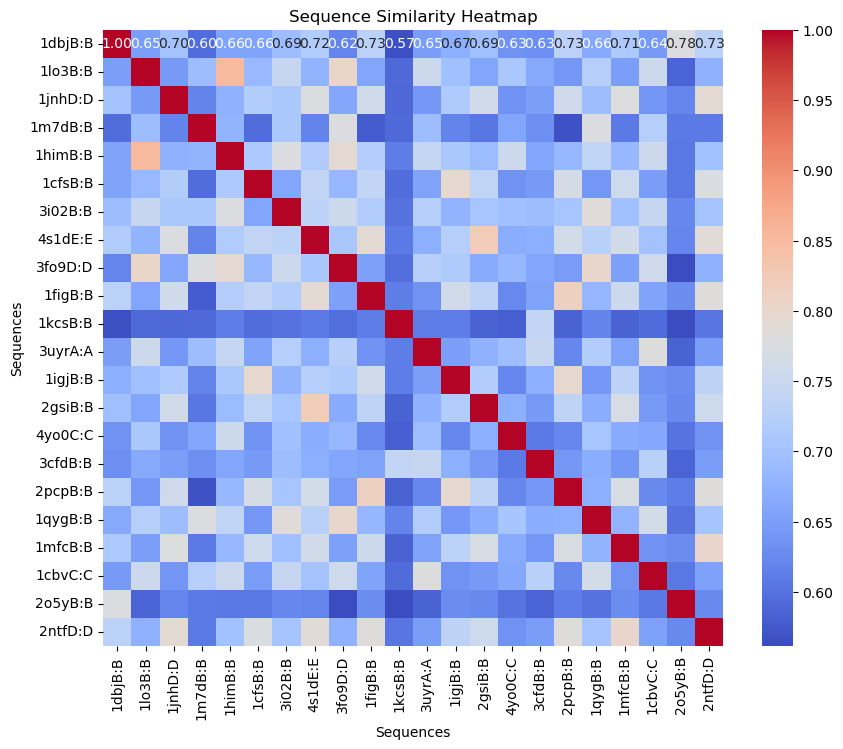

In [13]:
from Bio import SeqIO
from Bio import pairwise2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def compute_similarity_matrix(sequences):
    num_sequences = len(sequences)
    similarity_matrix = np.zeros((num_sequences, num_sequences))
    
    for i in range(num_sequences):
        for j in range(i, num_sequences):  # 计算上三角部分
            if i == j:
                similarity_matrix[i, j] = 1.0  # 自身相似度为1
            else:
                alignment = pairwise2.align.globalxx(sequences[i], sequences[j], score_only=True)
                max_length = max(len(sequences[i]), len(sequences[j]))
                similarity_score = alignment / max_length  # 归一化相似度
                similarity_matrix[i, j] = similarity_score
                similarity_matrix[j, i] = similarity_score  # 矩阵对称
    
    return similarity_matrix

def plot_heatmap(similarity_matrix, sequence_ids):
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, xticklabels=sequence_ids, yticklabels=sequence_ids, cmap="coolwarm", annot=True, fmt=".2f")
    plt.title("Sequence Similarity Heatmap")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

if __name__ == "__main__":
    fasta_path = "/Users/yanyz/data/TOUGH-M1/scripts/data/all_seq_global.fasta"  # 请替换为你的FASTA文件路径
    
    # Read the sequences from the FASTA file
    sequences = []
    sequence_ids = []
    
    for record in SeqIO.parse(fasta_path, "fasta"):
        if record.id in cluster_2ntfD:
            sequences.append(str(record.seq))
            sequence_ids.append(record.id)
            count += 1
            print(record.id, str(record.seq))
    
    similarity_matrix = compute_similarity_matrix(sequences)
    plot_heatmap(similarity_matrix, sequence_ids)
